### Importing modules

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.layers import Conv2D
from keras.layers import Dense
import tensorflow as tf
import numpy as np
import cv2
import sys
import os 

### Exploring data 

In [11]:
# Loading an image
img = image.load_img("data/bvnb/train/baklava/00AMIVX685FR.jpg")

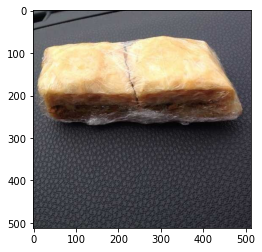

In [12]:
# Viewing the image
plt.imshow(img)

In [14]:
# Viewing the image
cv2.imread("data/bvnb/train/baklava/00AMIVX685FR.jpg")

array([[[113, 110, 106],
        [113, 110, 106],
        [113, 110, 106],
        ...,
        [111,  98, 100],
        [111,  98, 100],
        [109,  96,  98]],

       [[114, 111, 107],
        [114, 111, 107],
        [115, 112, 108],
        ...,
        [103,  90,  92],
        [102,  89,  91],
        [ 99,  86,  88]],

       [[111, 108, 104],
        [111, 108, 104],
        [112, 109, 105],
        ...,
        [102,  89,  91],
        [ 99,  86,  88],
        [ 95,  82,  84]],

       ...,

       [[ 62,  59,  55],
        [ 59,  56,  52],
        [ 54,  51,  47],
        ...,
        [ 60,  52,  53],
        [ 67,  59,  60],
        [ 62,  54,  55]],

       [[ 72,  69,  65],
        [ 73,  70,  66],
        [ 71,  68,  64],
        ...,
        [ 64,  56,  57],
        [ 69,  61,  62],
        [ 63,  55,  56]],

       [[ 58,  55,  51],
        [ 64,  61,  57],
        [ 67,  64,  60],
        ...,
        [ 52,  44,  45],
        [ 54,  46,  47],
        [ 49,  41,  42]]

In [15]:
# Checking image shape
cv2.imread("data/bvnb/train/baklava/00AMIVX685FR.jpg").shape

(512, 512, 3)

### Processing the data

In [16]:
# Reshaping the data
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [68]:
# Loading the data
train_dataset = train.flow_from_directory("data/bvnb/train/",
                                         target_size=(224,224),
                                         batch_size=3,
                                         class_mode="binary")

validation_dataset = validation.flow_from_directory("data/bvnb/validation/",
                                         target_size=(224,224),
                                         batch_size=3,
                                         class_mode="binary")

Found 3560 images belonging to 2 classes.
Found 137 images belonging to 2 classes.


In [69]:
# Checking the classes
train_dataset.class_indices

{'baklava': 0, 'not_baklava': 1}

In [70]:
# Checking the classes
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

### Model

In [71]:
# Defining the CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# Compiling the model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# Fiting the model
model.fit(train_dataset, steps_per_epoch=len(train_dataset),validation_data=validation_dataset,epochs=10)
# Saving the model
model.save('bvnb_model.h5')

Epoch 1/10
1187/1187 [==============================] - 158s 133ms/step - loss: 0.6068 - accuracy: 0.6812 - val_loss: 0.5441 - val_accuracy: 0.7518
Epoch 2/10
1187/1187 [==============================] - 157s 133ms/step - loss: 0.5170 - accuracy: 0.7466 - val_loss: 0.4982 - val_accuracy: 0.7445
Epoch 3/10
1187/1187 [==============================] - 158s 133ms/step - loss: 0.4226 - accuracy: 0.7978 - val_loss: 0.4447 - val_accuracy: 0.8102
Epoch 4/10
1187/1187 [==============================] - 158s 133ms/step - loss: 0.3028 - accuracy: 0.8739 - val_loss: 0.3645 - val_accuracy: 0.8613
Epoch 5/10
1187/1187 [==============================] - 156s 132ms/step - loss: 0.1798 - accuracy: 0.9326 - val_loss: 0.3186 - val_accuracy: 0.8978
Epoch 6/10
1187/1187 [==============================] - 159s 134ms/step - loss: 0.1256 - accuracy: 0.9494 - val_loss: 0.2520 - val_accuracy: 0.9124
Epoch 7/10
1187/1187 [==============================] - 167s 141ms/step - loss: 0.0587 - accuracy: 0.9801 - val_

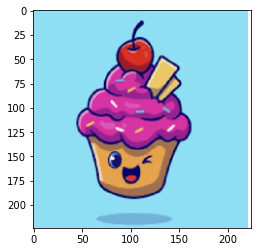

1/1 [==============================] - 0s 168ms/step
Not Baklava


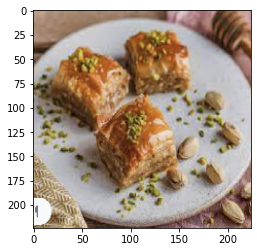

1/1 [==============================] - 0s 48ms/step
Baklava


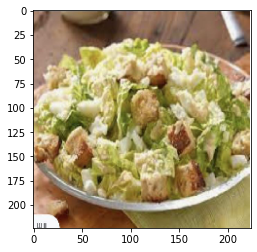

1/1 [==============================] - 0s 40ms/step
Not Baklava


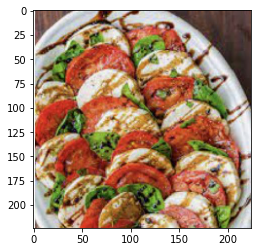

1/1 [==============================] - 0s 48ms/step
Not Baklava


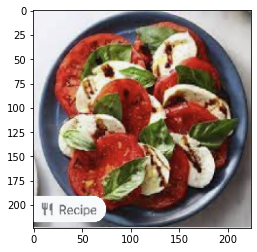

1/1 [==============================] - 0s 40ms/step
Not Baklava


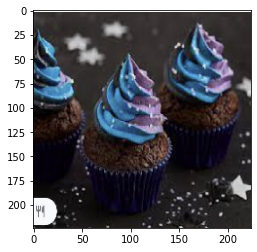

1/1 [==============================] - 0s 40ms/step
Baklava


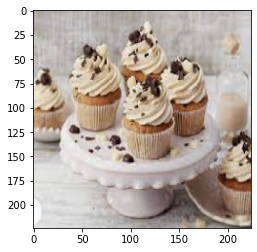

1/1 [==============================] - 0s 40ms/step
Not Baklava


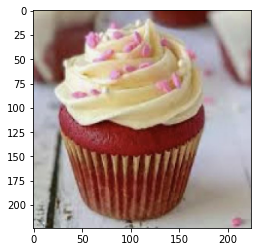

1/1 [==============================] - 0s 40ms/step
Not Baklava


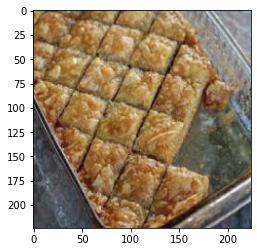

1/1 [==============================] - 0s 40ms/step
Not Baklava


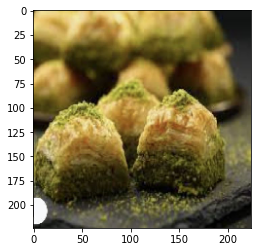

1/1 [==============================] - 0s 32ms/step
Baklava


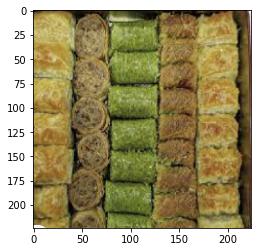

1/1 [==============================] - 0s 37ms/step
Baklava


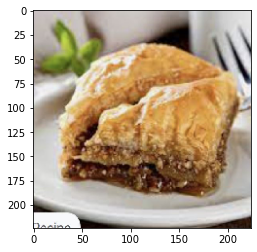

1/1 [==============================] - 0s 32ms/step
Baklava


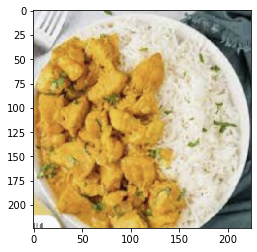

1/1 [==============================] - 0s 32ms/step
Not Baklava


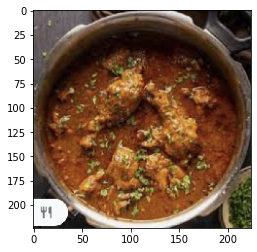

1/1 [==============================] - 0s 32ms/step
Not Baklava


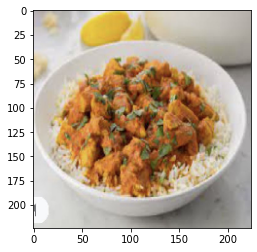

1/1 [==============================] - 0s 40ms/step
Baklava


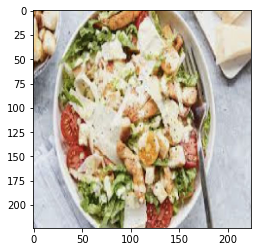

1/1 [==============================] - 0s 40ms/step
Not Baklava


In [8]:
# Loading the model
model = load_model('bvnb_model.h5')
# Setting the directory path
dir_path="data/bvnb/new"

# Loop to test each image in the file
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+"//"+i,target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    
    if val == 0:
        print("Baklava")
    else:
        print("Not Baklava")